## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from scipy.spatial.distance import cdist, pdist

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree':
            self.kd_tree = KDTree(X, leaf_size=2, metric=self.metric)
    
    def predict(self, X):
        if self.algorithm == 'brute':
            knn_index = np.argsort(cdist(X, self.X, metric=self.metric), axis=1)
        elif self.algorithm == 'kd_tree':
            knn_index = self.kd_tree.query(X, k=self.n_neighbors, return_distance=False)
        else:
            return None
        knn_class = self.y[knn_index]
        prediction = np.apply_along_axis(lambda arr_str: np.argmax(np.bincount(arr_str[:self.n_neighbors])), 1, knn_class)
        return prediction
        
            
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

In [8]:
sklearn_pred

array([0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2])

In [9]:
my_clf_pred

array([0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2], dtype=int64)

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [15]:
timeit.timeit('clf.fit(X_train, y_train)', number=10000, globals=({'clf' : clf, 'X_train' : X_train, 'y_train' : y_train}))

1.598648499999996

In [16]:
timeit.timeit('my_clf.fit(X_train, y_train)', number=10000, globals=({'my_clf':my_clf, 'X_train':X_train, 'y_train':y_train}))

0.003088199999993435

In [17]:
timeit.timeit('clf.predict(X_test)', number=10000, globals=({'clf':clf, 'X_test':X_test}))

7.953762000000012

In [18]:
timeit.timeit('my_clf.predict(X_test)', number=10000, globals=({'my_clf':my_clf, 'X_test':X_test}))

2.084333199999989

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [19]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [21]:
timeit.timeit('clf.fit(X_train, y_train)', number=10000, globals=({'clf' : clf, 'X_train' : X_train, 'y_train' : y_train}))

3.022911899999997

In [22]:
timeit.timeit('my_clf.fit(X_train, y_train)', number=10000, globals=({'my_clf':my_clf, 'X_train':X_train, 'y_train':y_train}))

2.436381400000002

In [23]:
timeit.timeit('clf.predict(X_test)', number=10000, globals=({'clf':clf, 'X_test':X_test}))

8.654098700000006

In [24]:
timeit.timeit('my_clf.predict(X_test)', number=10000, globals=({'my_clf':my_clf, 'X_test':X_test}))

2.3072481999999894

In [25]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

In [26]:
sklearn_pred

array([1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1])

In [27]:
my_clf_pred

array([1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1], dtype=int64)

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [28]:
train_newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [29]:
train_data = np.asarray(train_newsgroups['data'])
train_target = np.asarray(train_newsgroups['target'])

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [47]:
# Обработка данных, Преобразование данных в векторы, Фильтрация
vectorizerCV = CountVectorizer(strip_accents='unicode', stop_words='english', min_df=10)
vectorizerTV = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=10)

train_DictCV = vectorizerCV.fit_transform(train_data).toarray()
train_DictTV = vectorizerTV.fit_transform(train_data).toarray()

train_words = vectorizerTV.get_feature_names_out(train_data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [48]:
# Функция разбивает выборку на 3 фолда, Производит кросс-валидацию, Возвращает среднюю точность
def get_score(k_nn, train_dict, train_target, mtrc):
    kfold = KFold(n_splits=3, shuffle=True, random_state=1)
    sum_score = 0
    for train_ind, test_ind in kfold.split(tdict):
        my_clf = MyKNeighborsClassifier(n_neighbors=k_nn, algorithm='brute', metric=mtrc)
        my_clf.fit(train_dict[train_ind], train_target[train_ind])
        my_clf_pred = my_clf.predict(train_dict[test_ind])
        sum_score += accuracy_score(train_target[test_ind], my_clf_pred)  
    return sum_score / 3

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
# Поиск оптимального количества ближайших соседей, Оптимальной метрики, Проверка с/без TfIdf
# Построение графика зависимости средней точности от количества соседей
# Обучение лучшей модели на всей тренировочной выборке

In [24]:
scores_cos_CV = np.asarray([get_score(i, train_DictCV, train_target, 'cosine') for i in range(1, 11)])

In [25]:
scores_mink_CV = np.asarray([get_score(i, train_DictCV, train_target, 'minkowski') for i in range(1, 11)])

In [26]:
scores_cos_TV = np.asarray([get_score(i, train_DictTV, train_target, 'cosine') for i in range(1, 11)])

In [27]:
scores_mink_TV = np.asarray([get_score(i, train_DictTV, train_target, 'minkowski') for i in range(1, 11)])

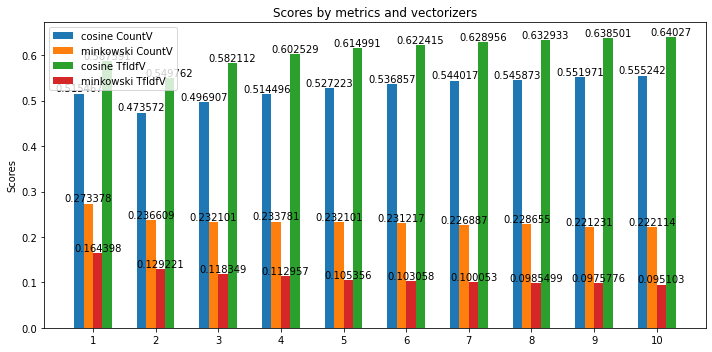

In [28]:
labels = np.arange(1, 11)

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
rects_c_cv = ax.bar(x - 3*width/2, scores_cos_CV, width, label='cosine CountV')
rects_m_cv = ax.bar(x - width/2, scores_mink_CV, width, label='minkowski CountV')
rects_c_tv = ax.bar(x + 3*width/2, scores_cos_TV, width, label='cosine TfIdfV')
rects_m_tv = ax.bar(x + width/2, scores_mink_TV, width, label='minkowski TfIdfV')

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and vectorizers')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects_c_cv)
ax.bar_label(rects_m_cv)
ax.bar_label(rects_c_tv)
ax.bar_label(rects_m_tv)

fig.tight_layout()

plt.show()

In [58]:
# Лучшая модель - модель с 10 ближаёшими соседями, косинусной метрикой и TfIdf векторизацией
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
my_clf.fit(train_DictTV, train_target)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [52]:
test_newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [55]:
test_data = np.asarray(test_newsgroups['data'])
test_target = np.asarray(test_newsgroups['target'])

In [56]:
# Обработка данных, Преобразование данных в векторы, Фильтрация
test_words = vectorizerTV.get_feature_names_out(test_data)

test_in_train_ind = np.where(np.isin(test_words, train_words))[0]
train_in_test_ind = np.where(np.isin(train_words, test_words))[0]

test_DictTV = np.zeros((test_data.shape[0], train_words.shape[0]))
test_DictTV[:, train_in_test_ind] = vectorizerTV.fit_transform(test_data).toarray()[:, test_in_train_ind]

In [ ]:
# Оценка точности на test части
my_clf_pred = my_clf.predict(test_DictTV)

In [ ]:
# Модель слегка переобучилась поэтому точность на тестовой выборке чуть меньше, чем на обучающей
accuracy_score(test_target, my_clf_pred)